<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Customizing-Plots-using-matplotlib" data-toc-modified-id="Customizing-Plots-using-matplotlib-1">Customizing Plots using <code>matplotlib</code></a></span><ul class="toc-item"><li><span><a href="#Customizing-Figures-and-Axes" data-toc-modified-id="Customizing-Figures-and-Axes-1.1">Customizing Figures and Axes</a></span></li><li><span><a href="#Customizing-Marks" data-toc-modified-id="Customizing-Marks-1.2">Customizing Marks</a></span></li><li><span><a href="#Aribitrary-text-and-LaTeX-support" data-toc-modified-id="Aribitrary-text-and-LaTeX-support-1.3">Aribitrary text and LaTeX support</a></span></li><li><span><a href="#Customizing-a-seaborn-plot-using-matplotlib" data-toc-modified-id="Customizing-a-seaborn-plot-using-matplotlib-1.4">Customizing a <code>seaborn</code> plot using <code>matplotlib</code></a></span></li></ul></li></ul></div>

In [1]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

In [2]:
# HIDDEN
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + 8]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - 6))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

## Customizing Plots using `matplotlib`

Although `seaborn` allows us to quickly create many types of plots, it does not give us fine-grained control over the chart. For example, we cannot use `seaborn` to modify a plot's title, change x or y-axis labels, or add annotations to a plot. Instead, we must use the `matplotlib` library that `seaborn` is based off of.

`matplotlib` provides basic building blocks for creating plots in Python. Although it gives great control, it is also more verbose—recreating the `seaborn` plots from the previous sections in `matplotlib` would take many lines of code. In fact, we can think of `seaborn` as a set of useful shortcuts to create `matplotlib` plots. Although we prefer to prototype plots in `seaborn`, in order to customize plots for publication we will need to learn basic pieces of `matplotlib`.

Before we look at our first simple example, we must activate matplotlib support in the notebook:

In [3]:
# This line allows matplotlib plots to appear as images in the notebook
# instead of in a separate window.
%matplotlib inline

# plt is a commonly used shortcut for matplotlib
import matplotlib.pyplot as plt

### Customizing Figures and Axes

In order to create a plot in `matplotlib`, we create a *figure*, then add an *axes* to the figure. In `matplotlib`, an axes is a single chart, and figures can contain multiple axes in a tablular layout. An axes contains *marks*, the lines or patches drawn on the plot.

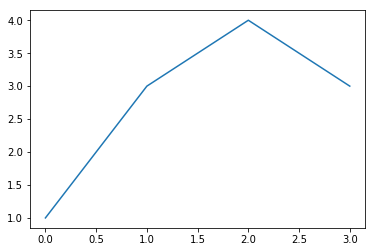

In [4]:
# Create a figure
f = plt.figure()

# Add an axes to the figure. The second and third arguments create a table
# with 1 row and 1 column. The first argument places the axes in the first
# cell of the table.
ax = f.add_subplot(1, 1, 1)

# Create a line plot on the axes
ax.plot([0, 1, 2, 3], [1, 3, 4, 3])

# Show the plot. This will automatically get called in a Jupyter notebook
# so we'll omit it in future cells
plt.show()

To customize the plot, we can use other methods on the axes object:

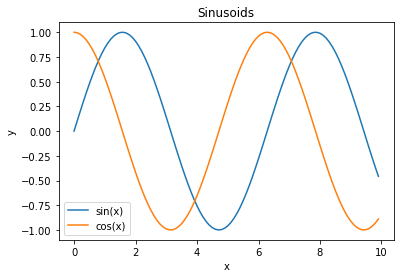

In [5]:
f = plt.figure()
ax = f.add_subplot(1, 1, 1)

x = np.arange(0, 10, 0.1)

# Setting the label kwarg lets us generate a legend
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.legend()

ax.set_title('Sinusoids')
ax.set_xlabel('x')
ax.set_ylabel('y');

As a shortcut, `matplotlib` has plotting methods on the `plt` module itself that will automatically initialize a figure and axes.

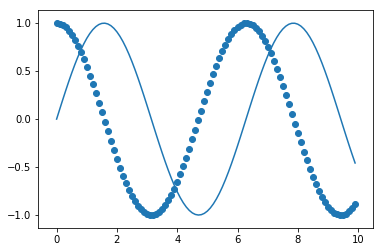

In [6]:
# Shorthand to create figure and axes and call ax.plot
plt.plot(x, np.sin(x))

# When plt methods are called multiple times in the same cell, the
# existing figure and axes are reused.
plt.scatter(x, np.cos(x));

The `plt` module has analogous methods to an axes, so we can recreate one of the plots above using `plt` shorthands.

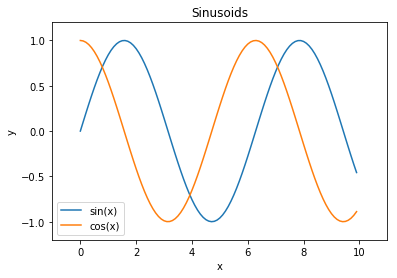

In [7]:
x = np.arange(0, 10, 0.1)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.legend()

# Shorthand for ax.set_title
plt.title('Sinusoids')
plt.xlabel('x')
plt.ylabel('y')

# Set the x and y-axis limits
plt.xlim(-1, 11)
plt.ylim(-1.2, 1.2);

### Customizing Marks

To change properties of the plot marks themselves (e.g. the lines in the plot above), we can pass additional arguments into `plt.plot`.

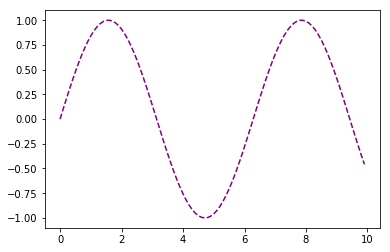

In [8]:
plt.plot(x, np.sin(x), linestyle='--', color='purple');

Checking the `matplotlib` documentation is the easiest way to figure out which arguments are available for each method. Another way is to store the returned line object:

    In [1]: line, = plot([1,2,3])

These line objects have a lot of properties you can control, here's the full list using tab-completion in IPython:

    In [2]: line.set
    line.set                     line.set_drawstyle           line.set_mec
    line.set_aa                  line.set_figure              line.set_mew
    line.set_agg_filter          line.set_fillstyle           line.set_mfc
    line.set_alpha               line.set_gid                 line.set_mfcalt
    line.set_animated            line.set_label               line.set_ms
    line.set_antialiased         line.set_linestyle           line.set_picker
    line.set_axes                line.set_linewidth           line.set_pickradius
    line.set_c                   line.set_lod                 line.set_rasterized
    line.set_clip_box            line.set_ls                  line.set_snap
    line.set_clip_on             line.set_lw                  line.set_solid_capstyle
    line.set_clip_path           line.set_marker              line.set_solid_joinstyle
    line.set_color               line.set_markeredgecolor     line.set_transform
    line.set_contains            line.set_markeredgewidth     line.set_url
    line.set_dash_capstyle       line.set_markerfacecolor     line.set_visible
    line.set_dashes              line.set_markerfacecoloralt  line.set_xdata
    line.set_dash_joinstyle      line.set_markersize          line.set_ydata
    line.set_data                line.set_markevery           line.set_zorder
    

But the `setp` call (short for set property) can be very useful, especially
while working interactively because it contains introspection support, so you
can learn about the valid calls as you work:

    In [7]: line, = plot([1,2,3])

    In [8]: setp(line, 'linestyle')
      linestyle: [ ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''`` ]         and any drawstyle in combination with a linestyle, e.g. ``'steps--'``.         

    In [9]: setp(line)
      agg_filter: unknown
      alpha: float (0.0 transparent through 1.0 opaque)         
      animated: [True | False]         
      antialiased or aa: [True | False]
      ...
      ... much more output omitted
      ...

In the first form, it shows you the valid values for the 'linestyle' property,
and in the second it shows you all the acceptable properties you can set on the
line object.  This makes it easy to discover how to customize your figures
to get the visual results you need.

### Aribitrary text and LaTeX support

In matplotlib, text can be added either relative to an individual axis object
or to the whole figure.

These commands add text to the Axes:

- `set_title()` - add a title
- `set_xlabel()` - add an axis label to the x-axis
- `set_ylabel()` - add an axis label to the y-axis
- `text()` - add text at an arbitrary location
- `annotate()` - add an annotation, with optional arrow

And these act on the whole figure:

- `figtext()` - add text at an arbitrary location
- `suptitle()` - add a title

And any text field can contain LaTeX expressions for mathematics, as long as
they are enclosed in `$` signs.

This example illustrates all of them:

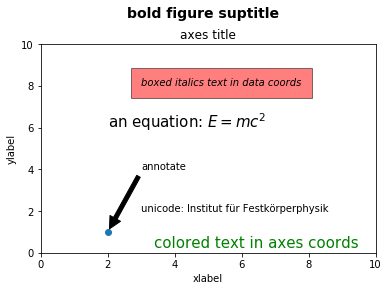

In [9]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(1, 1, 1)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, 'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10]);

### Customizing a `seaborn` plot using `matplotlib`

Now that we've seen how to use `matplotlib` to customize a plot, we can use the same methods to customize `seaborn` plots since `seaborn` creates plots using `matplotlib` behind-the-scenes.

In [10]:
# Load seaborn
import seaborn as sns
sns.set()
sns.set_context('talk')

# Load dataset
ti = sns.load_dataset('titanic').dropna().reset_index(drop=True)
ti.head()

,survived,pclass,sex,age,...,deck,embark_town,alive,alone
0,1,1,female,38.0,...,C,Cherbourg,yes,False
1,1,1,female,35.0,...,C,Southampton,yes,False
2,0,1,male,54.0,...,E,Southampton,no,True
3,1,3,female,4.0,...,G,Southampton,yes,False
4,1,1,female,58.0,...,C,Southampton,yes,True


We'll start with this plot:

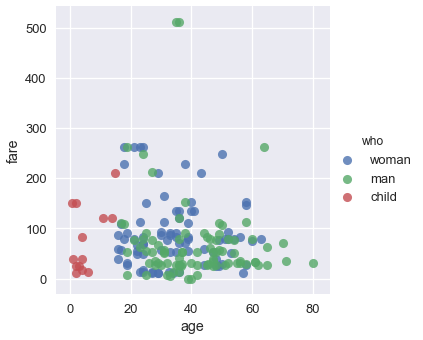

In [11]:
sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False);

We can see that the plot needs a title and better labels for the x and y-axes. In addition, the two people with the most expensive fares survived, so we can annotate them on our plot.

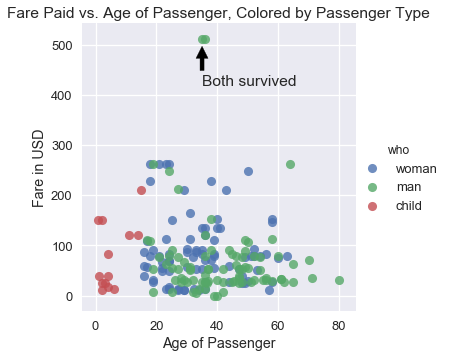

In [12]:
sns.lmplot(x='age', y='fare', hue='who', data=ti, fit_reg=False)

plt.title('Fare Paid vs. Age of Passenger, Colored by Passenger Type')
plt.xlabel('Age of Passenger')
plt.ylabel('Fare in USD')

plt.annotate('Both survived', xy=(35, 500), xytext=(35, 420),
             arrowprops=dict(facecolor='black', shrink=0.05));

In practice, we use `seaborn` to quickly explore the data and then turn to `matplotlib` for fine-tuning once we decide on the plots to use in a paper or presentation.